<a href="https://colab.research.google.com/github/Raushan787/IPR/blob/main/Pressure_Quadratic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [38]:
#Data taken from Tarek Ahmed Example-8-3
Pr=1952 #psia initial prssure of reservoir
Pr_f=1700  #psia prssure of reservoir after depletion
Pwf_i=np.array([1700,1500,1300]) #psia
Qg=np.array([2624.6,4154.7,5425.1]) #Mscf/day

ug_Bg=0.01206 # at 1952 psia
ug_Bg_f=0.01180 #at 1700 psia

Detail
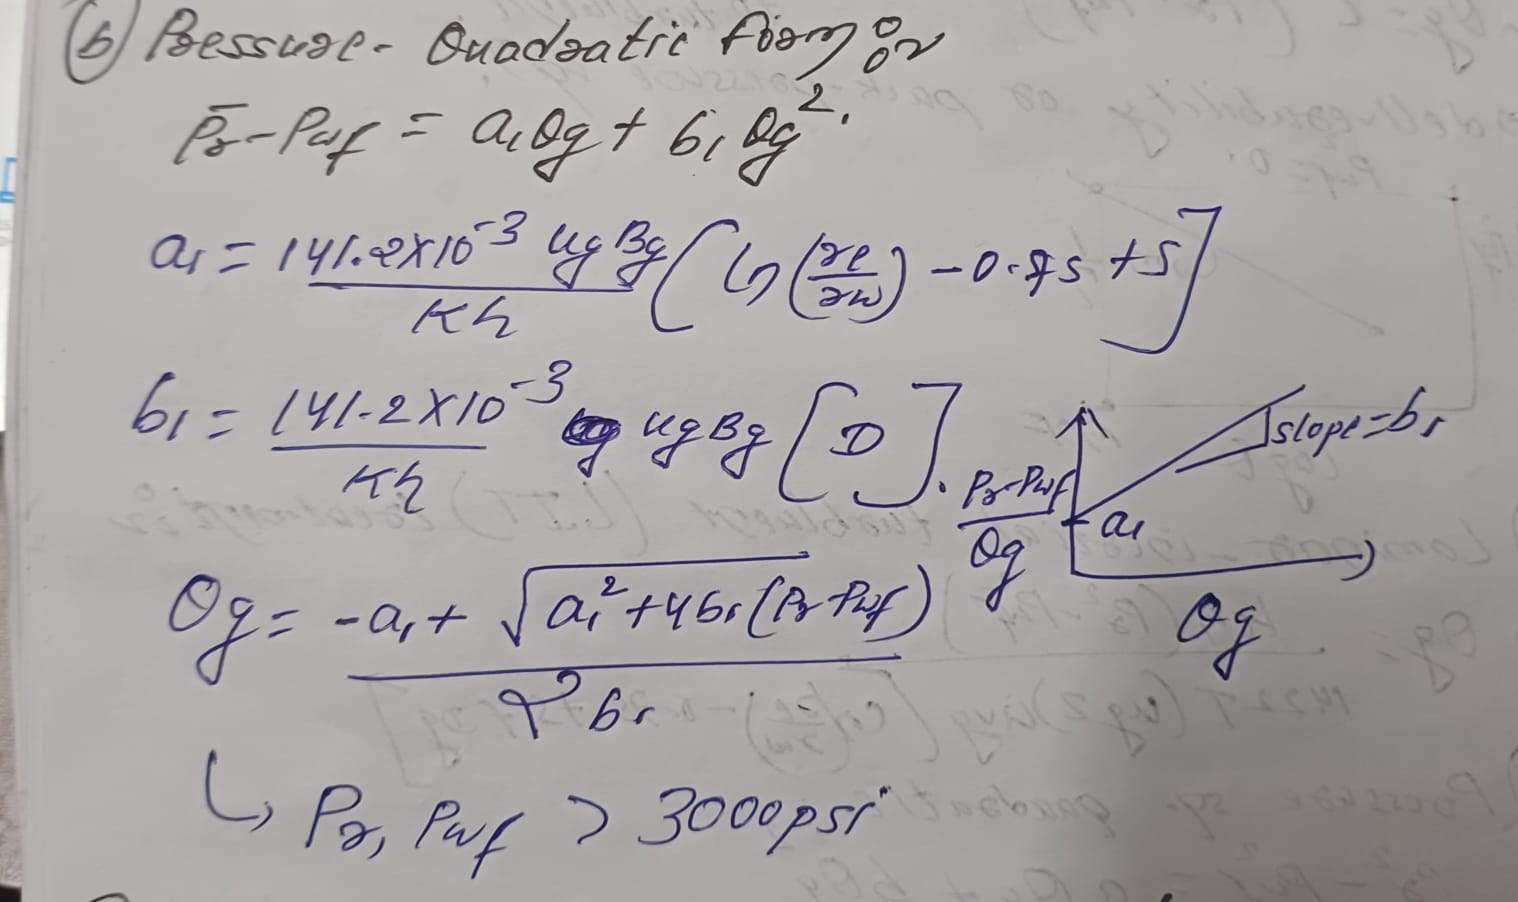

In [39]:
#Calculating (Pr - Pwf)/Qg
result=((Pr)-(Pwf_i))/Qg
result


array([0.09601463, 0.10879245, 0.12018212])

In [40]:
#Creating dataframe
df=pd.DataFrame({"Pwf":Pwf_i,"Qg":Qg,"(Pr-Pwf)/Qg":result})
df

,Pwf,Qg,(Pr-Pwf)/Qg
0,1700,2624.6,0.096015
1,1500,4154.7,0.108792
2,1300,5425.1,0.120182


In [41]:
#Perform linear regression
slope, intercept, r_value, p_value, std_err=linregress(Qg,result)
slope , intercept

(8.620315839427791e-06, 0.07326113885025798)

In [42]:
#Slope=b
#Intercept=a

a=intercept
b=slope

In [43]:
#Create array of Pwf
Pwf=np.arange(Pr,-1,-1)

In [44]:
#Generating IPR curve for initial reservoir pressure
Qg=(-a+ np.sqrt(a**2+4*b*(Pr-Pwf)))/(2*b)

AOF=(-a+np.sqrt(a**2+4*b*(Pr)))/(2*b)
Qg

array([    0.        ,    13.62794849,    27.21246937, ...,
       11379.70091433, 11383.4116773 , 11387.12155964])

In [45]:
#Calculating of a and b constant after reservoir pressure depletion 1700
Pwf_f=np.arange(1700,-1,-1)
a_f=a*(ug_Bg_f/ug_Bg)
b_f=b*(ug_Bg_f/ug_Bg)
a_f,b_f

(0.07168171131285607, 8.434471551015584e-06)

In [47]:
#Generating IPR curve for final reservoir pressure
Qg_f=(-a_f+ np.sqrt(a_f**2+4*b_f*(Pr_f-Pwf_f)))/(2*b_f)

AOF_f=(-a_f+np.sqrt(a_f**2+4*b_f*(Pr_f)))/(2*b_f)
Qg_f

array([    0.        ,    13.92773481,    27.81011671, ...,
       10561.93265002, 10565.93450519, 10569.93527968])

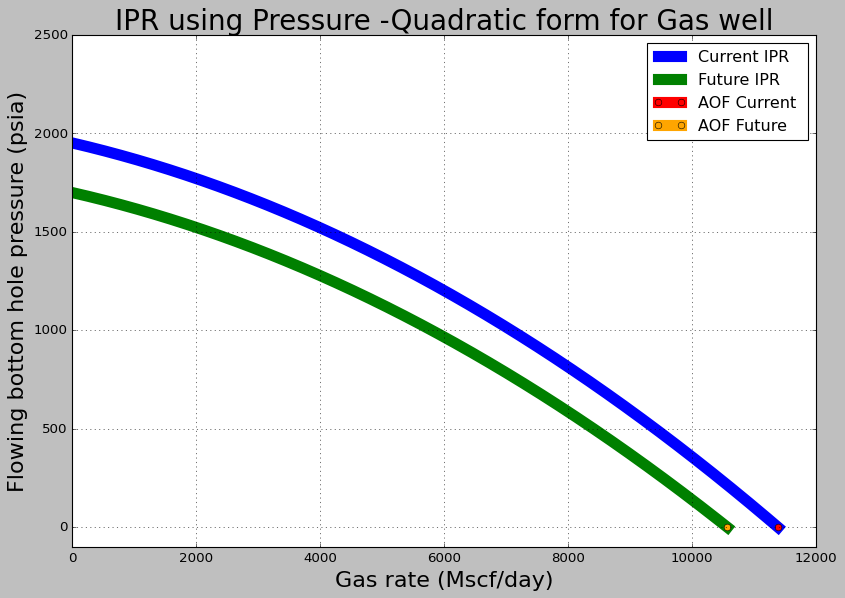

In [48]:
#Create plot
plt.figure(figsize=(12,8))
plt.style.use("classic")
plt.plot(Qg,Pwf,label="Current IPR",lw="10")
plt.plot(Qg_f,Pwf_f,label="Future IPR",lw="10")
plt.plot(AOF,0,label="AOF Current ",marker="o",c="red",lw=10)
plt.plot(AOF_f,0,label="AOF Future ",marker="o",c="orange",lw=10)
plt.ylim(-100,2500)
plt.ylabel("Flowing bottom hole pressure (psia)",size=20)
plt.xlabel("Gas rate (Mscf/day)",size=20)
plt.title("IPR using Pressure -Quadratic form for Gas well",size=25)
plt.legend(loc="best")
plt.grid()
plt.show()